# ANALYSIS BOTTOM FILMS

In [2]:
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from collections import Counter, defaultdict
import community.community_louvain as community_louvain
import numpy as np
import re

Number of self-loops: 48
Number of nodes: 1762
Number of edges: 2911


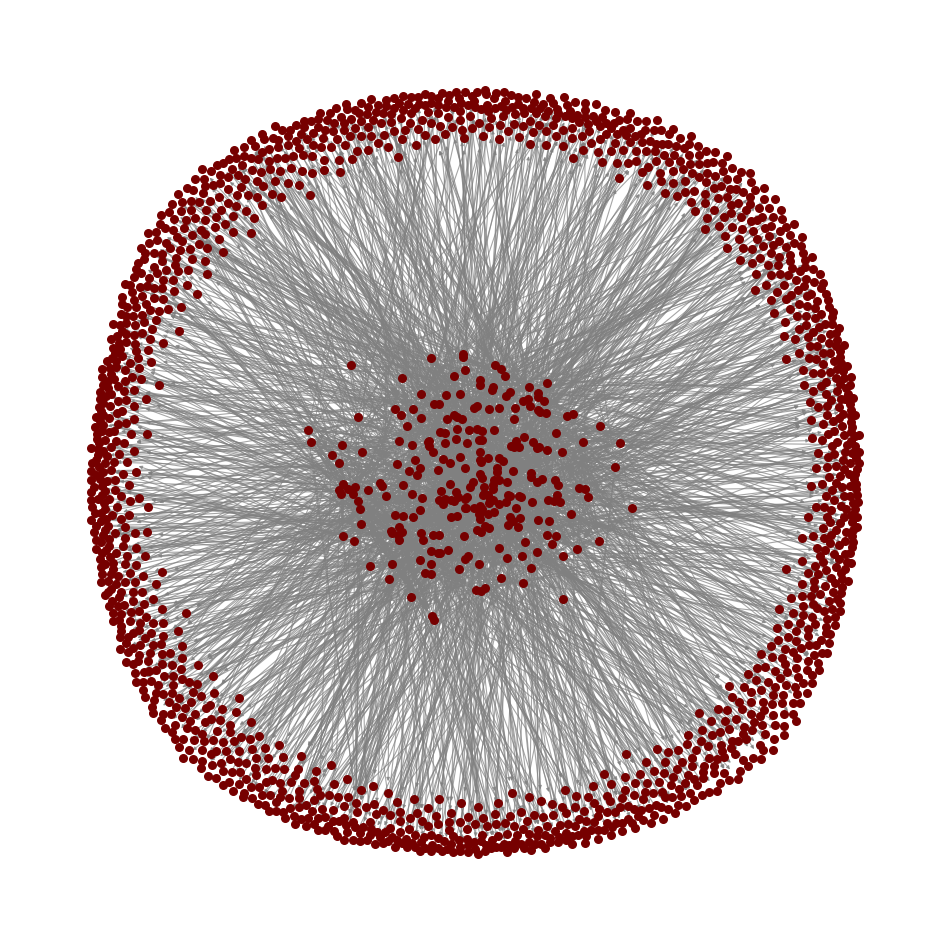

In [3]:
# Load the CSV file into a DataFrame
df = pd.read_csv('bottom_movie_data_with_similar.csv')

# Create an empty directed graph
D = nx.DiGraph()

# Add nodes and edges based on the similarity list
for index, row in df.iterrows():
    film = row['Name']
    similar_films = row['Similar Movies'].split(', ')  # Splitting the similar films into a list
    
    # Add the film as a node (it will be added automatically when creating edges)
    D.add_node(film)
    
    # Add edges between the film and its similar films
    for similar_film in similar_films:
        D.add_edge(film, similar_film)

# Delete self-loops
self_loops = list(nx.selfloop_edges(D))
print("Number of self-loops:", len(self_loops))
D.remove_edges_from(self_loops)

# Num of nodes and edges
print("Number of nodes:", D.number_of_nodes())
print("Number of edges:", D.number_of_edges())

# Plot the graph
plt.figure(figsize=(12, 12))

# Positions for nodes
pos = nx.spring_layout(D, seed=42)  # Layout for consistent

# Draw edges and nodes
nx.draw_networkx_edges(D, pos, edge_color='gray', alpha=0.7, width=0.8, arrowsize=5)
nx.draw_networkx_nodes(D, pos, node_color='#760000', node_size=30)

# plt.title('Top Movies Directed', fontsize=15)
plt.axis('off')
plt.show()

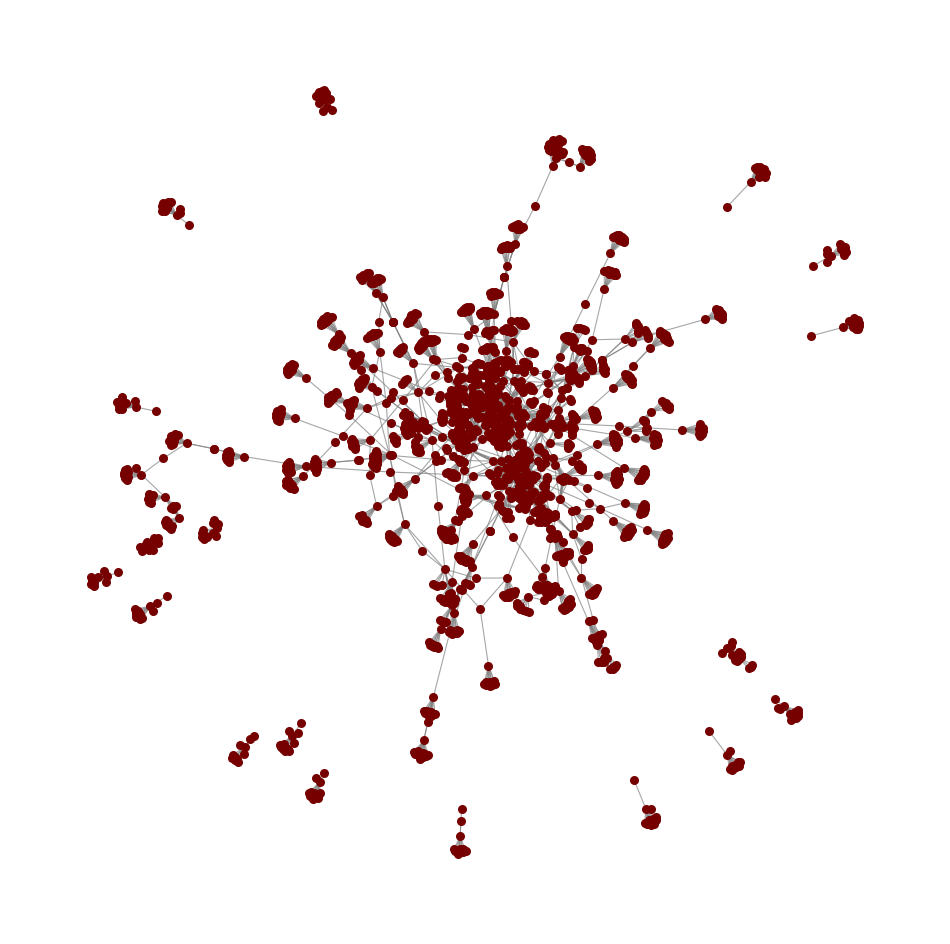

In [6]:
# Make undirected graph
G = D.to_undirected()

# Plot the graph
plt.figure(figsize=(12, 12))

# Positions for nodes
pos = nx.spring_layout(G, seed=42)  # Layout for consistent

# Draw edges and nodes
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7, width=0.8)
nx.draw_networkx_nodes(G, pos, node_color='#760000', node_size=30)

# plt.title('Top Movies Undirected', fontsize=15)
plt.axis('off')
plt.show()

Number of nodes: 1138
Number of edges: 1738


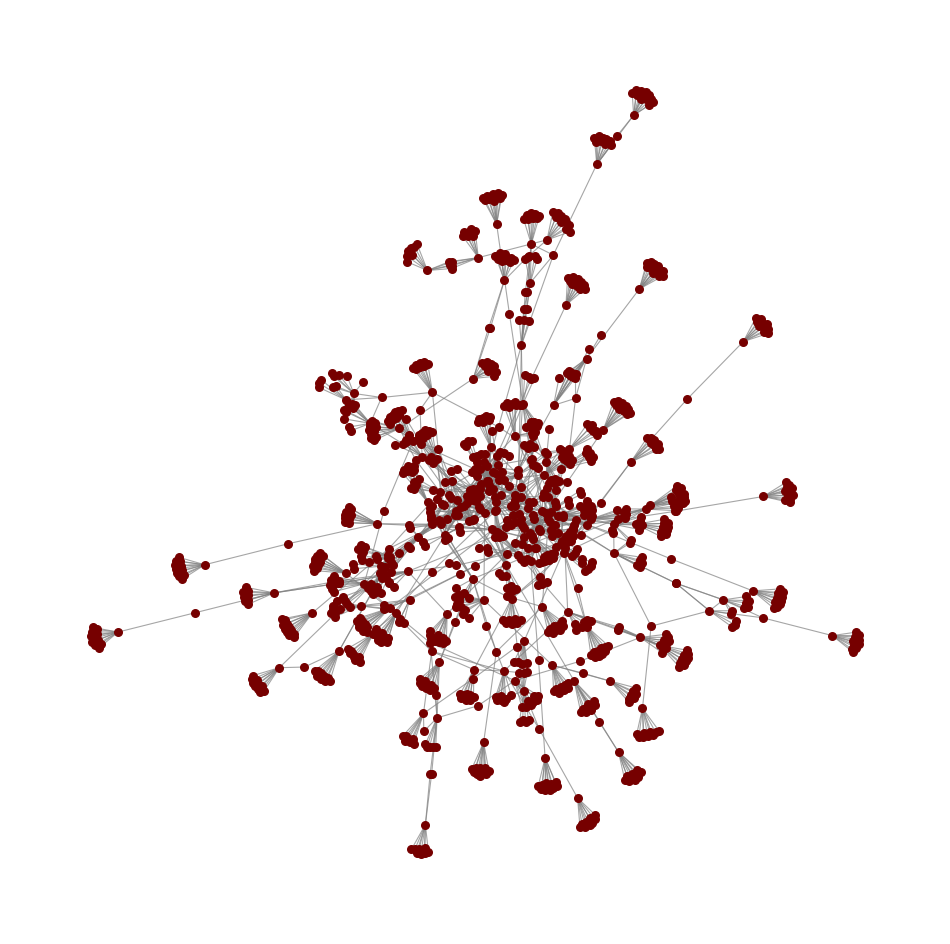

In [7]:
# keep only the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_cc).copy()

# Num of nodes and edges
print("Number of nodes:", G_largest.number_of_nodes())
print("Number of edges:", G_largest.number_of_edges())

# Plot the graph
plt.figure(figsize=(12, 12))

# Positions for nodes
pos = nx.spring_layout(G_largest, seed=42)  # Layout for consistent

# Draw edges and nodes
nx.draw_networkx_edges(G_largest, pos, edge_color='gray', alpha=0.7, width=0.8)
nx.draw_networkx_nodes(G_largest, pos, node_color='#760000', node_size=30)

# plt.title('Bottom Movies Undirected', fontsize=15)
plt.axis('off')
plt.show()

Save all node names in a txt.

<div class="alert alert-warning">
DONT RUN AGAIN!
</div>

In [ ]:
# Save node names to a text file
node_names = list(G_largest.nodes)
with open('bottom_net_movies_titles.txt', 'w') as file:
    for node in node_names:
        file.write(f"{node}\n")

print(f"Node names have been saved.")